In [ ]:

import pandas as pd
df=pd.read_csv("/content/Loan dataset1.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [1]:
df.info()

NameError: name 'df' is not defined

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
print('Gender Mode: ',df['Gender'].mode())
print('Married mode: ',df['Married'].mode())
print('Self_Employed',df['Self_Employed'].mode())
print('Credit_History',df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married mode:  0    Yes
Name: Married, dtype: object
Self_Employed 0    No
Name: Self_Employed, dtype: object
Credit_History 0    1.0
Name: Credit_History, dtype: float64


In [ ]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df['Dependents'].replace('3+',4,inplace=True)#Replacing 3+ to 4
df['Dependents'].value_counts()

NameError: name 'df' is not defined

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)#replacing with mode
df['Married'].fillna(df['Married'].mode()[0],inplace=True)#replacing with mode
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)#replacing with mode
df['LoanAmount'].fillna((df['LoanAmount'].mean()),inplace=True)#replacing with mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)#replacing with suitable option after visual analysis
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)#replacing with mode
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)#replacing with mode

In [ ]:
df['Dependents']=df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int64')

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         3
Property_Area          3
Loan_Status            2
dtype: int64

In [ ]:
df.duplicated().sum()

0

<Figure size 1000x400 with 0 Axes>

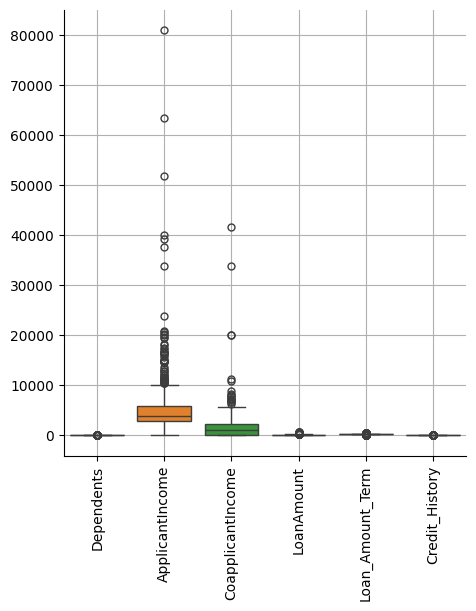

In [ ]:
##Checking for outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,4))
sns.catplot(data=df,kind='box')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
df.isna().any()

Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [ ]:
#Fetching all object data typecolumns to covert
obj_col=df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [ ]:
#Converting object to numeric data type
df.replace({'Married':{'Yes':1,'No':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':\
            {'Rural':0,'Semiurban':0.5,'Urban':1},'Education':{'Graduate':1,"Not Graduate":0},\
            'Loan_Status': {'Y':1, 'N':0}},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [ ]:
df=pd.get_dummies(df)

In [ ]:
df.sample(2)

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
66,0,0,0,0,3200,2254.0,126.0,180.0,0.000000,1.0,0,False,True
83,1,0,1,0,6000,2250.0,265.0,360.0,0.842199,0.5,0,False,True


In [ ]:
df.isna().any()

Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
Gender_Female        False
Gender_Male          False
dtype: bool

In [ ]:
#Saving our cleaned , preprocessed df in data variable for future analysis if needed

In [ ]:
data=df

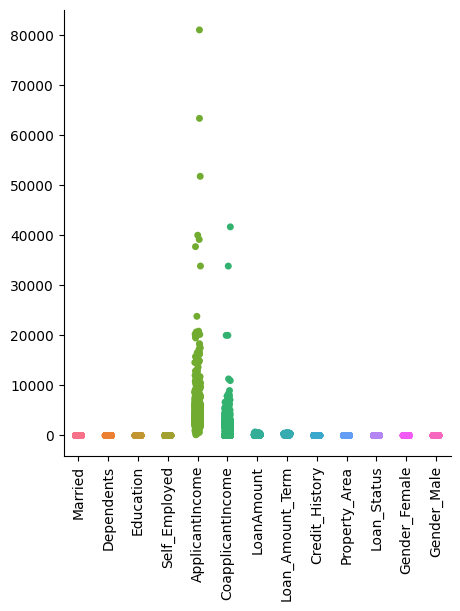

In [ ]:
sns.catplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Dropping the anomalies from data
df.drop(df['CoapplicantIncome'][df['CoapplicantIncome']>15000].index, inplace=True)
df.drop(df['ApplicantIncome'][df['ApplicantIncome']>40000].index, inplace=True)

In [ ]:
df.describe()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,0.654036,0.813839,0.779242,0.133443,5132.243822,1449.655552,144.258760,342.484349,0.842286,0.515651,0.690280
std,0.476074,1.196780,0.415100,0.340334,4366.069396,1773.588776,79.199307,64.029562,0.349733,0.393011,0.462759
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2891.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,3813.000000,1167.000000,128.000000,360.000000,1.000000,0.500000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5763.000000,2264.500000,162.000000,360.000000,1.000000,1.000000,1.000000
max,1.000000,4.000000,1.000000,1.000000,39999.000000,11300.000000,650.000000,480.000000,1.000000,1.000000,1.000000


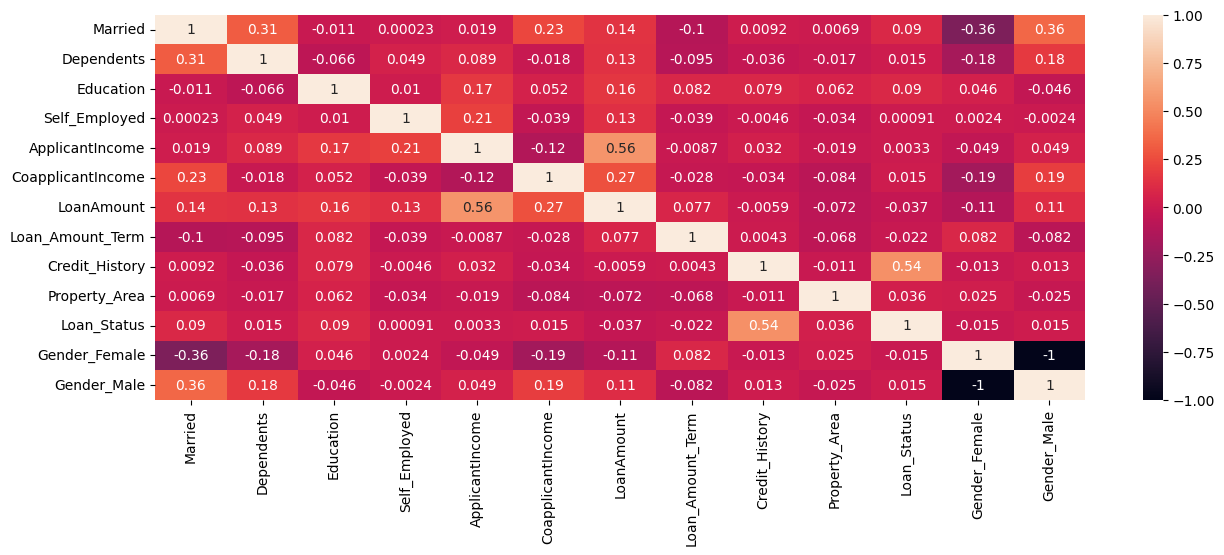

In [ ]:
#Correlation of data
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Normalising data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=df.drop('Loan_Status',axis=1)
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])
x.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Gender_Female,Gender_Male
0,-1.374946,-0.680584,0.532258,-0.392419,0.164300,-0.818031,0.027212,0.273781,0.451327,1.233423,-0.473065,0.473065
1,0.727301,0.155680,0.532258,-0.392419,-0.125902,0.032923,-0.205458,0.273781,0.451327,-1.313134,-0.473065,0.473065
2,0.727301,-0.680584,0.532258,2.548299,-0.488770,-0.818031,-0.988939,0.273781,0.451327,1.233423,-0.473065,0.473065
3,0.727301,-0.680584,-1.878790,-0.392419,-0.584358,0.512573,-0.306553,0.273781,0.451327,1.233423,-0.473065,0.473065
4,-1.374946,-0.680584,0.532258,-0.392419,0.198914,-0.818031,-0.041180,0.273781,0.451327,1.233423,-0.473065,0.473065


In [ ]:
#sns.countplot(df['Loan_Status'])
#plt.show()

In [ ]:
#Splitting dataset- Separating data and label
y=df.Loan_Status#Target
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=4,test_size=0.25,stratify=y)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(455, 12) (455,) (152, 12) (152,)


In [ ]:
#Creating model function to test multiple models and choose the ideal one
def mymodel(model):
    model.fit(xtrain,ytrain) #Training the model
    ypred=model.predict(xtest)#Makind predictions
    train_accuracy=model.score(xtrain,ytrain) #Evaluating the model
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy') #Printing the scores
    print('Accuracy:',accuracy_score(ytest,ypred),"\nClassification Report:\n",classification_report(ytest,ypred), \
          '\nConfusion Matrix: \n', confusion_matrix(ytest,ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    print()
    return model

In [ ]:
#Testing the accuracy of our model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC(kernel='linear'))
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 0.8157894736842105 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        47
           1       0.80      0.97      0.88       105

    accuracy                           0.82       152
   macro avg       0.84      0.72      0.75       152
weighted avg       0.83      0.82      0.80       152
 
Confusion Matrix: 
 [[ 22  25]
 [  3 102]]
Training Accuracy: 0.8131868131868132
Testing Accuracy :0.8157894736842105


SVC(kernel='linear Accuracy
Accuracy: 0.8223684210526315 
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.45      0.61        47
           1       0.80      0.99      0.89       105

    accuracy                           0.82       152
   macro avg       0.88      0.72      0.75       152
weighted avg       0.85      0.82      0.80       152
 
Confusion Matrix: 
 [[ 21  26]
 [  1 104]]
Training Accura

In [ ]:
#KNN Hypertuning
tr=[]
te=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)

    train=knn.score(xtrain,ytrain)
    test=knn.score(xtest,ytest)

    tr.append(train)
    te.append(test)


In [ ]:
print(tr)


[1.0, 0.8681318681318682, 0.8681318681318682, 0.8615384615384616, 0.8131868131868132, 0.8131868131868132, 0.810989010989011, 0.7868131868131868, 0.8043956043956044, 0.8043956043956044, 0.8065934065934066, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.810989010989011, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.8087912087912088, 0.8043956043956044, 0.8065934065934066, 0.8043956043956044, 0.8021978021978022, 0.7934065934065934, 0.7978021978021979, 0.789010989010989, 0.7956043956043956]


In [ ]:
len(tr)

30

In [ ]:
print(te)

[0.7368421052631579, 0.6578947368421053, 0.8092105263157895, 0.7697368421052632, 0.8157894736842105, 0.8092105263157895, 0.8157894736842105, 0.8223684210526315, 0.8223684210526315, 0.8223684210526315, 0.8223684210526315, 0.8223684210526315, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8157894736842105, 0.8092105263157895, 0.8157894736842105, 0.8092105263157895, 0.8157894736842105, 0.8092105263157895, 0.8092105263157895]


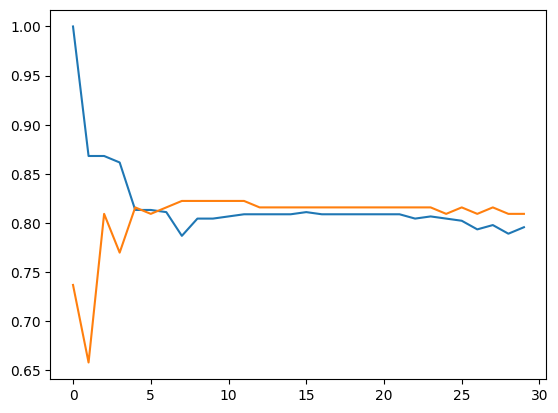

In [ ]:
plt.plot(tr)
plt.plot(te)

In [ ]:
knn=mymodel(KNeighborsClassifier(n_neighbors=5))

KNeighborsClassifier Accuracy
Accuracy: 0.8157894736842105 
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.47      0.61        47
           1       0.80      0.97      0.88       105

    accuracy                           0.82       152
   macro avg       0.84      0.72      0.75       152
weighted avg       0.83      0.82      0.80       152
 
Confusion Matrix: 
 [[ 22  25]
 [  3 102]]
Training Accuracy: 0.8131868131868132
Testing Accuracy :0.8157894736842105




In [ ]:
#Trying imblearn to balance our target
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1.0,1,0,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0.0,0,0,1
2,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1.0,1,0,1
3,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1.0,1,0,1
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1.0,1,0,1


In [ ]:
print((df['Loan_Status']==0).sum())

188


In [ ]:
print((df['Loan_Status']==1).sum())

419


In [ ]:
#sns.countplot(df['Loan_Status'])
#plt.show()

In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
print('Shape before balancing data',x.shape,y.shape)

#Importing necessary modules
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

#Classifying the data
x,y=make_classification(n_samples=422,weights=[0.99],flip_y=0)

#Creating an object
ros=RandomOverSampler(sampling_strategy='minority')
x,y=ros.fit_resample(x,y)
print('Shape after balancing data',x.shape,y.shape)

Shape before balancing data (607, 12) (607,)
Shape after balancing data (834, 20) (834,)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1,test_size=0.25)
print('Shape: ',xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

Shape:  (625, 20) (625,) (209, 20) (209,)


In [ ]:
knn=mymodel(KNeighborsClassifier())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 0.9808612440191388 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        97
           1       0.97      1.00      0.98       112

    accuracy                           0.98       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.98      0.98      0.98       209
 
Confusion Matrix: 
 [[ 93   4]
 [  0 112]]
Training Accuracy: 0.984
Testing Accuracy :0.9808612440191388


DecisionTreeClassifier Accuracy
Accuracy: 1.0 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       112

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209
 
Confusion Matrix: 
 [[ 97   0]
 [  0 112]]
Training Accuracy: 1.0
Testing Accuracy

In [ ]:
def mymodel2(model):
    model.fit(xtrain,ytrain) #Training the model
    ypred=model.predict(xtest)#Makind predictions
    train_accuracy=model.score(xtrain,ytrain) #Evaluating the model
    test_accuracy=model.score(xtest,ytest)
    print(str(model)[:-2],'Accuracy') #Printing the scores
    print('Accuracy:',accuracy_score(ytest,ypred))
    #,"\nClassification Report:\n",classification_report(ytest,ypred), \
          #'\nConfusion Matrix: \n', confusion_matrix(ytest,ypred))
    #print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy :{test_accuracy}')
    print()
    #print()
    #return model
    conf_matrix=confusion_matrix(ytest, ypred)
    plt.figure(figsize=(4,4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('confusion matrix')
    plt.show()

KNeighborsClassifier Accuracy
Accuracy: 0.9808612440191388



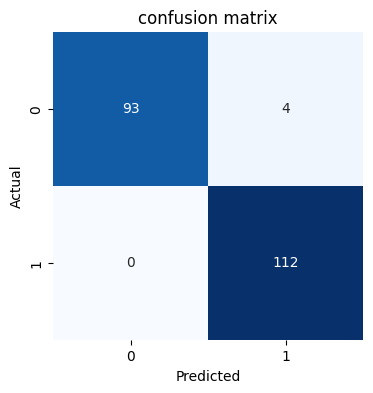

DecisionTreeClassifier Accuracy
Accuracy: 1.0



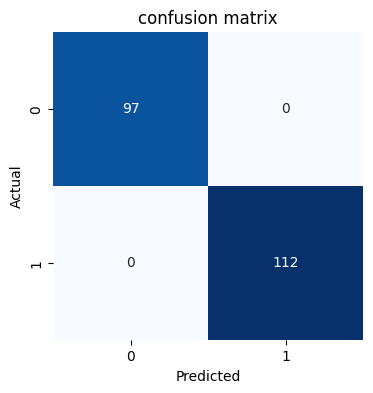

LogisticRegression Accuracy
Accuracy: 0.9808612440191388



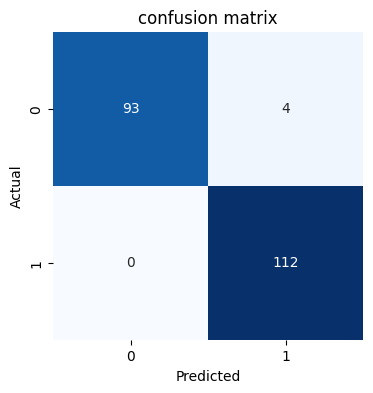

GaussianNB Accuracy
Accuracy: 0.9904306220095693



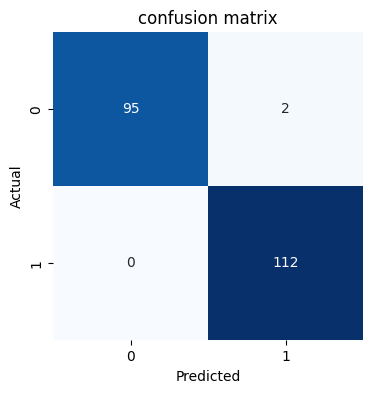

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
Accuracy: 0.9904306220095693



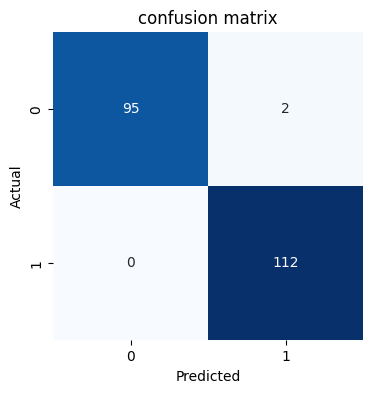

In [ ]:
knn=mymodel2(KNeighborsClassifier())
dt=mymodel2(DecisionTreeClassifier())
lr=mymodel2(LogisticRegression())
gnb=mymodel2(GaussianNB())
rfc=mymodel2(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

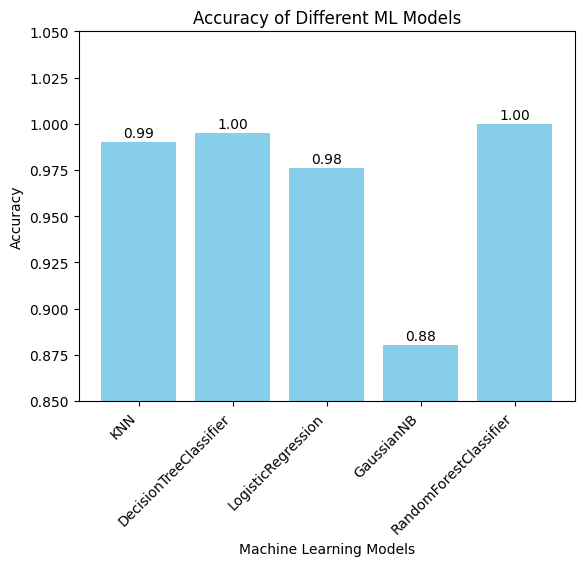

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual model names and accuracies)
model_names = ['KNN', 'DecisionTreeClassifier', 'LogisticRegression', 'GaussianNB','RandomForestClassifier']
accuracies = [0.9904306220095693,0.9952153110047847,0.9760765550239234,0.8803827751196173,1.0]

# Plotting the bar chart
#plt.figure(figsize=(60,20))
plt.bar(model_names, accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.xticks(rotation=45,ha='right')

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.ylim(0.85, 1.05)  # Set the y-axis limit to represent accuracy values between 0 and 1
#plt.bar(x,acc df,width=0.4)
plt.show()


In [ ]:
x=df.drop('Loan_Status',axis=1)
y=df.Loan_Status
print('Shape of model before balancing data',x.shape,y.shape)

#Importing necessary modules
from imblearn.over_sampling import SMOTE

#Classifying the data
make_classification(n_samples=422,weights=[0.99],flip_y=0,random_state=2)

#Creating an object
s=SMOTE(sampling_strategy='minority')
x,y=s.fit_resample(x,y)

print('Shape of model after balancing data',x.shape,y.shape)

Shape of model before balancing data (607, 12) (607,)
Shape of model after balancing data (838, 12) (838,)


In [ ]:
knn=mymodel(KNeighborsClassifier())
svc=mymodel(SVC())
dt=mymodel(DecisionTreeClassifier())
lr=mymodel(LogisticRegression())
gnb=mymodel(GaussianNB())
rfc=mymodel(RandomForestClassifier(n_estimators=80,max_depth=10,min_samples_leaf=12))

KNeighborsClassifier Accuracy
Accuracy: 0.9808612440191388 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        97
           1       0.97      1.00      0.98       112

    accuracy                           0.98       209
   macro avg       0.98      0.98      0.98       209
weighted avg       0.98      0.98      0.98       209
 
Confusion Matrix: 
 [[ 93   4]
 [  0 112]]
Training Accuracy: 0.984
Testing Accuracy :0.9808612440191388


SVC Accuracy
Accuracy: 0.9904306220095693 
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        97
           1       0.98      1.00      0.99       112

    accuracy                           0.99       209
   macro avg       0.99      0.99      0.99       209
weighted avg       0.99      0.99      0.99       209
 
Confusion Matrix: 
 [[ 95   2]
 [  0 112]]
Training Accuracy: 1.0
Testing Accuracy :0.

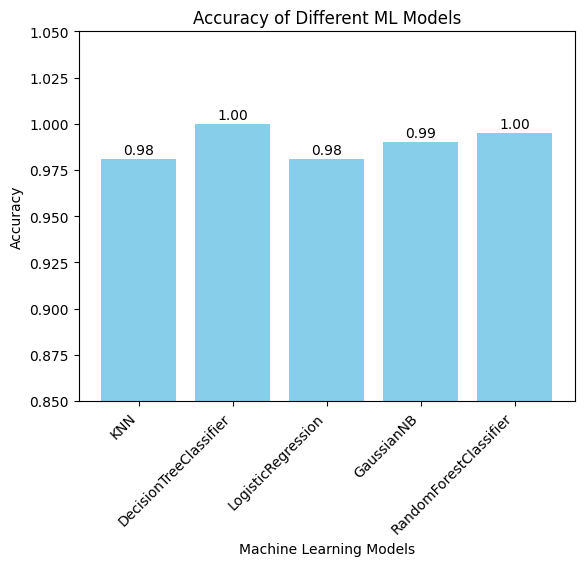

In [ ]:
import matplotlib.pyplot as plt

# Example data (replace this with your actual model names and accuracies)
model_names = ['KNN', 'DecisionTreeClassifier', 'LogisticRegression', 'GaussianNB','RandomForestClassifier']
accuracies = [0.9808612440191388,1.0 ,0.9808612440191388,0.9904306220095693,0.9952153110047847]

# Plotting the bar chart
#plt.figure(figsize=(60,20))
plt.bar(model_names, accuracies, color='skyblue')

# Adding labels and title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different ML Models')
plt.xticks(rotation=45,ha='right')
# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f'{accuracy:.2f}', ha='center', va='bottom')

# Show the plot
plt.ylim(0.85, 1.05)  # Set the y-axis limit to represent accuracy values between 0 and 1
#plt.bar(x,acc df,width=0.4)
plt.show()
